In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from pygdsm import GlobalSkyModel
import uvtools
import healpy as hp
from scipy.interpolate import RectBivariateSpline
import aipy

In [2]:
CST_PATH = '/users/aewallwi/lustre/Vivaldi_Stripped_Down//Farfield/'
beamfiles = sorted(glob.glob(CST_PATH + '*.txt'))
beamfiles = beamfiles[-50:] + beamfiles[:-50]
beamfiles = beamfiles[:-1]

In [36]:
CST_PATH_DISH = '/users/aewallwi/lustre/Vivaldi feed + dish - detailed mecha design/Vivaldi 1.8m - detailed mecha design - E-field - 100 ohm load - Pol X/'
beamfiles_dish = sorted(glob.glob(CST_PATH_DISH + '*.txt'))
beamfiles_dish = beamfiles_dish[-50:] + beamfiles_dish[:-50]
beamfiles_dish = beamfiles_dish[:-1]

In [98]:
THETA_AXIS = 0
PHI_AXIS = 1
VOLT_AXIS = 2
freqs = np.array([float(f.split()[1][3:-1]) for f in beamfiles]) / 1000 # GHz
thetas, phis = np.loadtxt(beamfiles[0], skiprows=2, usecols=(THETA_AXIS,PHI_AXIS)).T
thetas = np.deg2rad(np.unique(thetas))
phis = np.deg2rad(np.unique(phis))
data = np.array([np.loadtxt(f, skiprows=2, usecols=VOLT_AXIS) for f in beamfiles])
data.shape = (-1, phis.size, thetas.size)

In [99]:
NPIX = 129
L = np.linspace(-1, 1, NPIX,endpoint=True)
M = np.linspace(-1, 1, NPIX,endpoint=True)
L.shape = (-1, 1)
M.shape = ( 1,-1)
L = L * np.ones_like(M)
M = M * np.ones_like(L)
LM = L**2 + M**2
N = np.where(LM < 1, np.sqrt(1 - LM), 0)
th = np.arccos(L).flatten()
ph = np.arctan2(M, N).flatten() - np.pi
ph = np.where(ph < 0, 2*np.pi+ph, ph)

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [100]:
mask = np.where(LM < 1, 1, 0)
beams = np.array([RectBivariateSpline(phis, thetas, d)(ph, th, grid=False)**2 for d in data])
beams.shape = (-1, NPIX, NPIX)
beams *= mask
print(beams.shape)

(200, 129, 129)


<IPython.core.display.Javascript object>


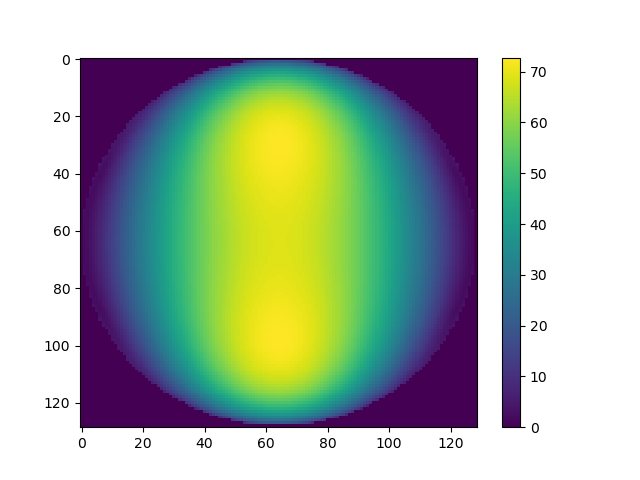

In [101]:
plt.figure()
uvtools.plot.waterfall(beams[100], mode='real')
plt.colorbar()

In [45]:
beamfiles_dish[0]

'/users/aewallwi/lustre/Vivaldi feed + dish - detailed mecha design/Vivaldi 1.8m - detailed mecha design - E-field - 100 ohm load - Pol X/farfield (f=50) [1].txt'

In [96]:
THETA_AXIS = 0
PHI_AXIS = 1
VOLT_AXIS = 2
freqs = np.array([float(f.split('=')[1].split(')')[0]) for f in beamfiles_dish]) / 1000 # GHz
thetas_dish, phis_dish = np.loadtxt(beamfiles_dish[0], skiprows=2, usecols=(THETA_AXIS,PHI_AXIS)).T
thetas_dish = np.deg2rad(np.unique(thetas_dish))
phis_dish = np.deg2rad(np.unique(phis_dish))
data_dish = np.array([np.loadtxt(f, skiprows=2, usecols=VOLT_AXIS) for f in beamfiles_dish])
data_dish.shape = (-1, phis_dish.size, thetas.size)

<IPython.core.display.Javascript object>


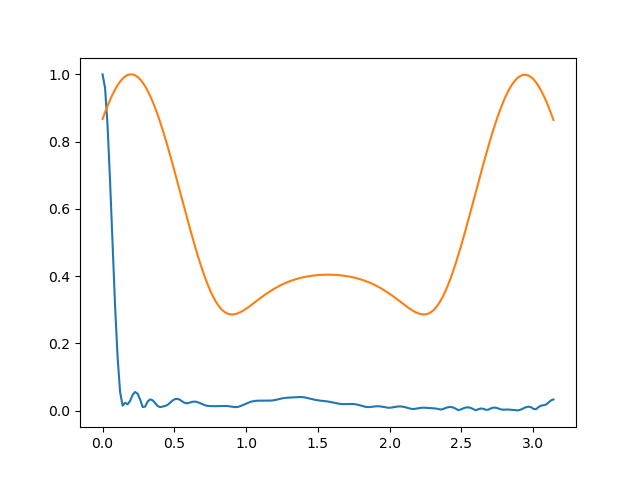

In [107]:
plt.figure()
plt.plot(thetas_dish, data_dish[-1,0,:]/data_dish[-1,0,:].max())
plt.plot(thetas, data[-1,0,:]/data[-1,0,:].max())

In [217]:
NPIX = 129
LD = np.linspace(-1, 1, NPIX,endpoint=True)
MD = np.linspace(-1, 1, NPIX,endpoint=True)
LD.shape = (-1, 1)
MD.shape = ( 1,-1)
LD = LD * np.ones_like(MD)
MD = MD * np.ones_like(LD)
LMD = LD**2 + MD**2
ND = np.where(LMD < 1, np.sqrt(1 - LMD), 0)
th_d = np.arcsin(LMD**.5).flatten()
ph_d = np.arctan2(MD, ND).flatten() - np.pi
ph_d = np.where(ph_d < 0, 2*np.pi+ph_d, ph_d)

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arcsin
  # Remove the CWD from sys.path while we load stuff.


In [218]:
maskd = np.where(LMD < 1, 1, 0)
beams_dish = np.array([RectBivariateSpline(phis_dish, thetas_dish, d)(ph_d, th_d, grid=False)**2 for d in data_dish])
beams_dish.shape = (-1, NPIX, NPIX)
beams_dish *= maskd

ValueError: x dimension of z must have same number of elements as x

In [219]:
beams_dish[~np.isfinite(beams_dish)] = 0.

<IPython.core.display.Javascript object>


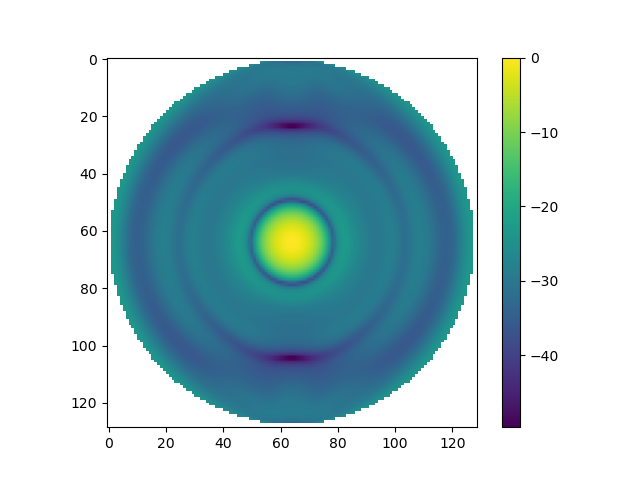

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [455]:
plt.figure()
plt.imshow(10*np.log10(beams_dish[100] / beams_dish[100].max()))
plt.colorbar()
plt.savefig('plots/dish_beam.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


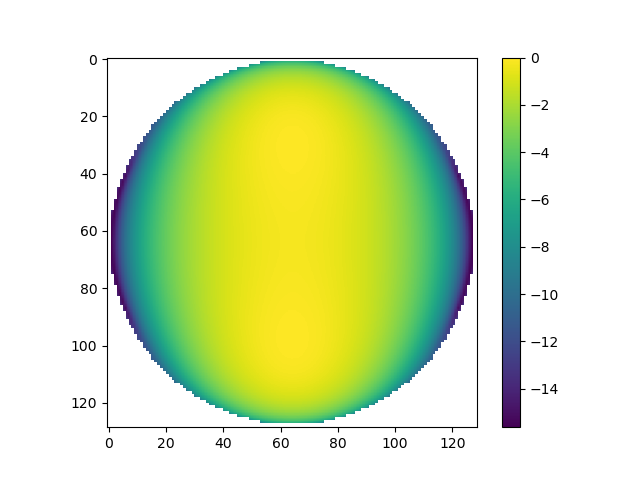

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [456]:
plt.figure()
plt.imshow(10*np.log10(beams[100] / beams[100].max()))
plt.colorbar()
plt.savefig('plots/feed_beam.png',bbox_inches='tight')

# Load up GSM

In [166]:
NSIDE = 64
hpb = aipy.healpix.HealpixBase(nside=NSIDE)
I_sky = np.empty((freqs.size, hpb.npix()))
gsm = GlobalSkyModel(freq_unit='GHz')
ga2eq = aipy.coord.convert_m('ga', 'eq')
for ch,f in enumerate(freqs):
    if NSIDE == 512:
        I_sky[ch] = gsm.generate(f)
    else:
        I_sky[ch] = hp.ud_grade(gsm.generate(f), nside_out=NSIDE)

In [167]:
NTIMES = 256
JD = 2459117
jds = np.linspace(JD, JD+1, NTIMES)

crd_eq = np.array(hpb.px2crd(np.arange(hpb.npix())))
antpos = np.array([[0.,0,0]]) # meters
loc = ('40:00', '0:00')
aa = aipy.amp.AntennaArray(loc, antpos)

eq2tops = []
for jd in jds:
    aa.set_jultime(jd)
    eq2tops.append(np.dot(aa.eq2top_m, ga2eq))
eq2tops = np.array(eq2tops)

<IPython.core.display.Javascript object>


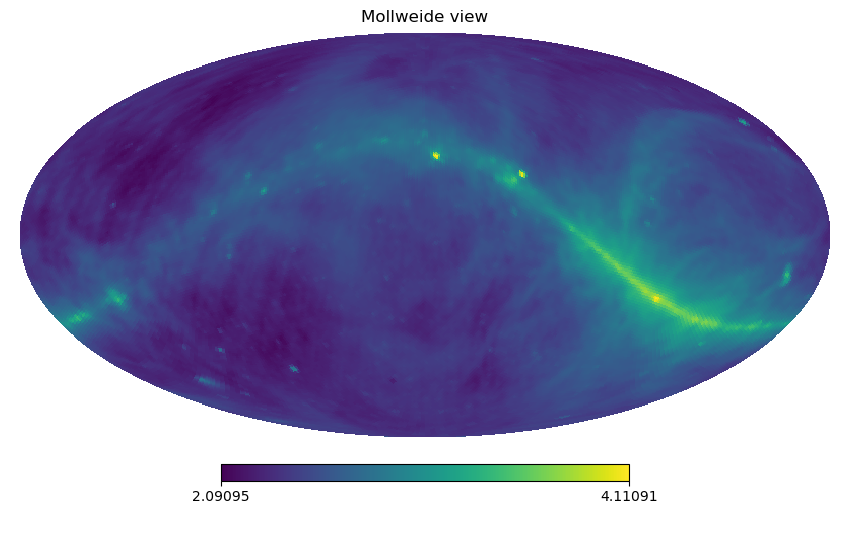

In [463]:
rot=hp.Rotator(coord=['G','C'])
hp.mollview(np.log10(rot.rotate_map_pixel(I_sky[100])), rot=[0,30,0])


<IPython.core.display.Javascript object>


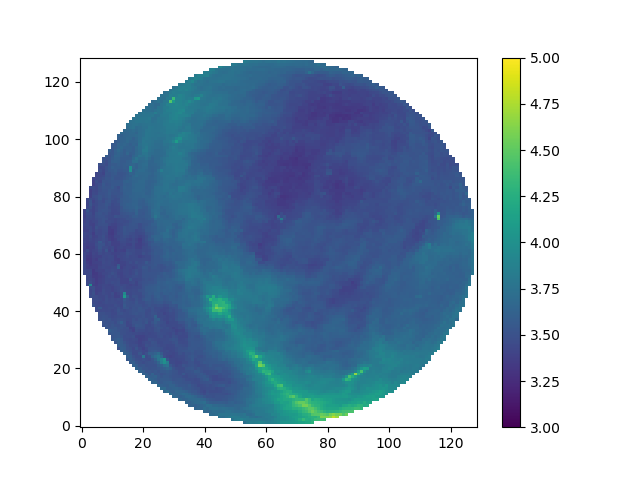

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/uvtools/plot.py:42: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)


In [168]:
hpm = aipy.healpix.HealpixMap(nside=NSIDE)
hpm.map = I_sky[0]
top = (M.flatten(), L.flatten(), N.flatten())
gx,gy,gz = np.dot(np.linalg.inv(np.dot(eq2tops[150], ga2eq)), top)
img = hpm[gx,gy,gz]
img.shape = (NPIX,NPIX)
plt.figure()
uvtools.plot.waterfall(mask * img, mode='log', mx=5, drng=2, origin='lower')
_ = plt.colorbar()

In [169]:
if not os.path.exists('auto.npz'):
    #from hera_gpu.vis import vis_gpu as vis
    from hera_sim.visibilities.vis_cpu import vis_cpu as vis

    data = np.empty((NTIMES,freqs.size), dtype=np.complex64)
    for ch in range(freqs.size):
        print(ch)
        data[:,ch] = vis(antpos, freqs[ch], eq2tops, crd_eq, I_sky[ch], beams[ch:ch+1])[:,0,0]
    np.savez('auto.npz', data=data, freqs=freqs, jds=jds)
else:
    print('Reading from file')
    npz = np.load('auto.npz')
    data = npz['data']
    jds = npz['jds']
    freqs = npz['freqs']

Reading from file


In [209]:
vis(antpos, freqs[ch], eq2tops, crd_eq, I_sky[ch], beams[ch:ch+1])[:,0,0]

array([2.6920118e+09+0.j, 2.7098432e+09+0.j, 2.7282437e+09+0.j,
       2.7481487e+09+0.j, 2.7687196e+09+0.j, 2.7891261e+09+0.j,
       2.8110600e+09+0.j, 2.8338760e+09+0.j, 2.8574508e+09+0.j,
       2.8823685e+09+0.j, 2.9081533e+09+0.j, 2.9349325e+09+0.j,
       2.9630006e+09+0.j, 2.9917926e+09+0.j, 3.0216177e+09+0.j,
       3.0525814e+09+0.j, 3.0845189e+09+0.j, 3.1170706e+09+0.j,
       3.1509952e+09+0.j, 3.1864850e+09+0.j, 3.2227791e+09+0.j,
       3.2604460e+09+0.j, 3.2992545e+09+0.j, 3.3384307e+09+0.j,
       3.3801073e+09+0.j, 3.4225797e+09+0.j, 3.4657533e+09+0.j,
       3.5092608e+09+0.j, 3.5543575e+09+0.j, 3.6003331e+09+0.j,
       3.6459095e+09+0.j, 3.6923264e+09+0.j, 3.7400271e+09+0.j,
       3.7876344e+09+0.j, 3.8367565e+09+0.j, 3.8875858e+09+0.j,
       3.9404296e+09+0.j, 3.9951555e+09+0.j, 4.0509911e+09+0.j,
       4.1090125e+09+0.j, 4.1697044e+09+0.j, 4.2323487e+09+0.j,
       4.2985334e+09+0.j, 4.3681357e+09+0.j, 4.4407014e+09+0.j,
       4.5166372e+09+0.j, 4.5954683e+09+

In [225]:
 beams_dish[ch:ch+1]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [229]:
import os
os.remove('auto_dish.npz')

In [232]:
if not os.path.exists('auto_dish.npz'):
    #from hera_gpu.vis import vis_gpu as vis
    from hera_sim.visibilities.vis_cpu import vis_cpu as vis

    data_dish = np.empty((NTIMES,freqs.size), dtype=np.complex64)
    for ch in range(freqs.size):
        print(ch)
        data_dish[:,ch] = vis(antpos, freqs[ch], eq2tops, crd_eq, I_sky[ch], beams_dish[ch:ch+1])[:,0,0]
    np.savez('auto_dish.npz', data=data, freqs=freqs, jds=jds)
else:
    print('Reading from file')
    npz = np.load('auto_dish.npz')
    data_dish = npz['data']
    jds = npz['jds']
    freqs = npz['freqs']

Reading from file


In [233]:
def dayenu(dat, width=1.):
    _, rdat, _ = uvtools.dspec.fourier_filter(
                                x=freqs * 1e9,
                                data=dat,
                                wgts=np.ones_like(dat),
                                mode='dpss_leastsq',
                                filter_centers=[0.],
                                filter_half_widths=[width * 1e-9],
                                eigenval_cutoff=[1e-12],
                                suppression_factors=[1e-9]
    )
    return rdat

rdata = dayenu(data / data[55]) * data[55]

In [234]:
ARES_PATH = '../../'
models = np.load(ARES_PATH + 'models_21cm.npz')['models'] / 1e3 # K
mfreqs = np.load(ARES_PATH + 'models_21cm.npz')['freqs']

In [235]:
fake_eor = models[78]


In [309]:
gain = beams[:,NPIX//2+1,NPIX//2+1]
avg = np.mean(data[-50:], axis=0) / gain
cal = 180 / avg[np.argmin(np.abs(freqs-0.180))]


gain_dish = beams_dish[:,NPIX//2+1, NPIX//2+1]
avg_dish = np.mean(data_dish[-50:], axis=0) / gain_dish
cal_dish = 180 / avg_dish[np.argmin(np.abs(freqs-0.180))]


<IPython.core.display.Javascript object>


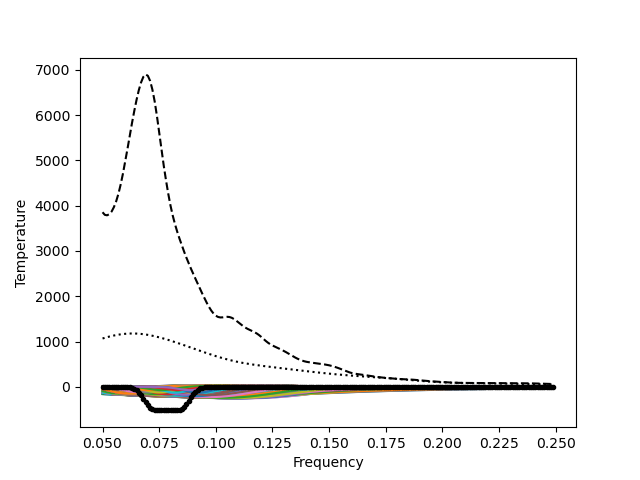

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [311]:
def gen_eor(A, nu0, w, tau):
    B = 4 * (freqs - nu0)**2 / w**2 * np.log(-1/tau * np.log((1+np.exp(-tau))/2))
    return -A * (1 - np.exp(-tau * np.exp(B))) / (1 - np.exp(-tau))

prms = {
    'A': 0.52,
    'nu0': 78.3e-3,
    'w': 20.7e-3,
    'tau': 6.5,
}
fake_eor = gen_eor(**prms)
#fake_eor = models[185]

idata_dish = cal_dish * data_dish / gain_dish + fake_eor
idata = cal * data / gain + fake_eor

plt.figure()

for mdl in models:
    plt.plot(freqs, 1e3*mdl)
plt.plot(freqs, 1e3*fake_eor, 'k.-')
plt.plot(freqs, idata[0], 'k:')
plt.plot(freqs, idata_dish[0], 'k--')

plt.xlabel('Frequency')
_ = plt.ylabel('Temperature')

In [338]:
#def dayenu(data):
#    return data

#idata = cal * data / gain + fake_eor

# Build a filter to exclude EoR from calibration signal
d = idata - np.mean(idata[-50:], axis=0)
dd = idata_dish - np.mean(idata_dish[-50:], axis=0)

C = np.dot(d.T, d)
Cd = np.dot(dd.T, dd)
U,S,V = np.linalg.svd(C)
Ud,Sd,Vd = np.linalg.svd(Cd)

#plt.figure(); plt.plot(S)
iS = np.identity(S.size)

#iS[10:,10:] = 0
iS[5:,5:] = 0
Cinv = np.dot(V.T, np.dot(iS, U.T))

Cinvd = np.dot(Vd.T, np.dot(iS, Ud.T))

#pcal = idata[55] - 0.5 * fake_eor # XXX
pcal = np.dot(Cinv, idata[55]) # filter to exclude most of eor signal
pcald = np.dot(Cinvd, idata_dish[55]) # filter to exclude most of eor signal

reor = dayenu(fake_eor / pcal) * pcal
rmodels = dayenu(models / pcal) * pcal

reord = dayenu(fake_eor / pcald) * pcald
rmodelsd = dayenu(models / pcald) * pcald


idata_flattened = dayenu(idata / pcal) * pcal

idata_flattened_dish = dayenu(idata_dish / pcald) * pcald

<IPython.core.display.Javascript object>


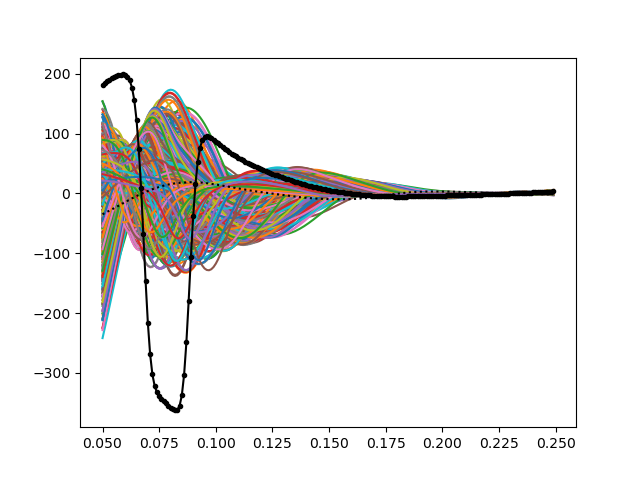

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/h

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/h

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/h

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/h

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/h

In [313]:
plt.figure()
for mdl in rmodels:
    plt.plot(freqs, 1e3*mdl)
plt.plot(freqs, 1e3*reor, 'k.-')
plt.plot(freqs, idata_flattened[0], 'k:')

In [339]:
d = idata_flattened - np.mean(idata_flattened[-50:], axis=0)
C = np.dot(d.T, d)
U,S,V = np.linalg.svd(C)



dd = idata_flattened_dish - np.mean(idata_flattened_dish[-50:], axis=0)
Cd = np.dot(dd.T, dd)
Ud,Sd,Vd = np.linalg.svd(Cd)

In [315]:
m = rmodels - np.mean(rmodels, axis=0)
Cm = np.dot(m.T, m)
Um, Sm, Vm = np.linalg.svd(Cm)

<IPython.core.display.Javascript object>


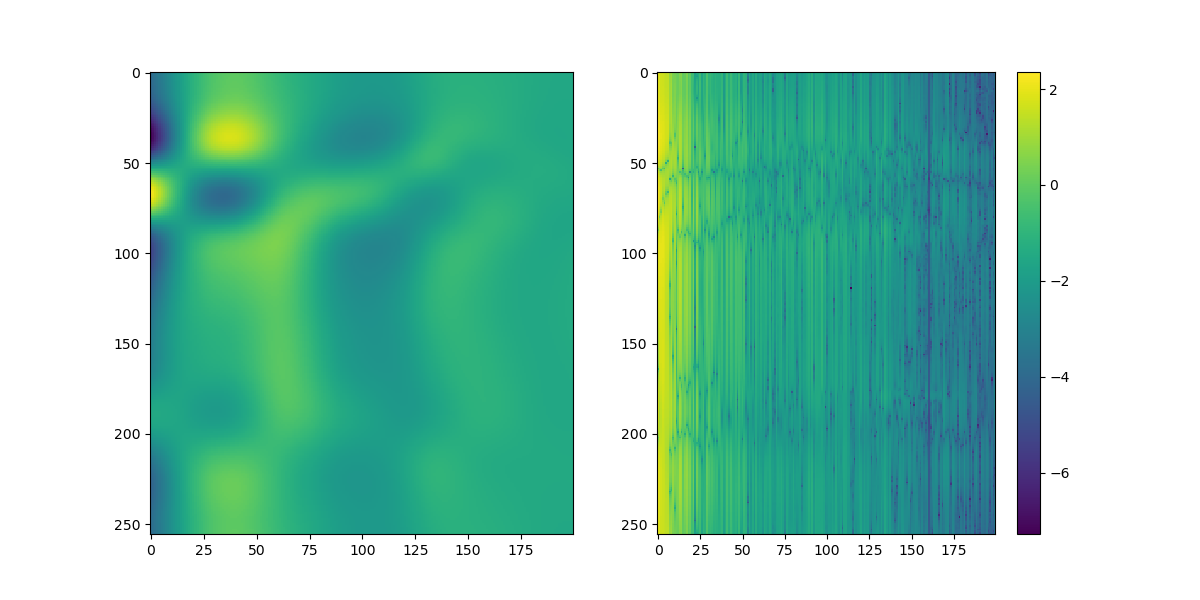

In [318]:
plt.figure(figsize=(12,6))
plt.subplot(121)
uvtools.plot.waterfall(idata_flattened, mode='real')
plt.subplot(122)
uvtools.plot.waterfall(np.dot(Vm, idata_flattened.T).T, mode='log')
_ = plt.colorbar()

<IPython.core.display.Javascript object>


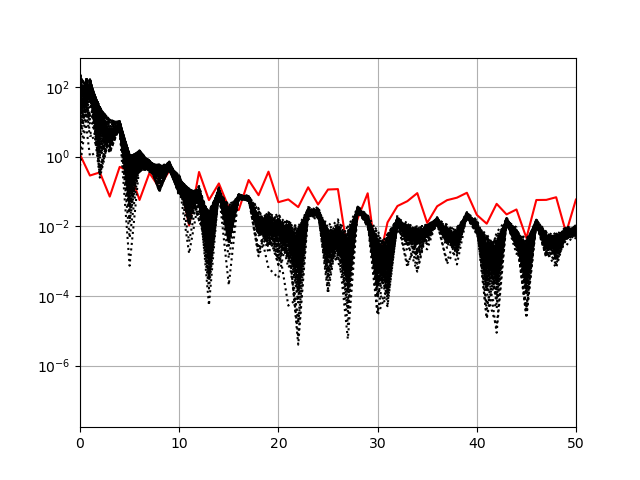

(1135, 200)


(0.0, 50.0)

In [351]:
plt.figure()
print(rmodels.shape)
#plt.semilogy(np.abs(np.dot(V, rmodels[78:79].T))**2)
plt.semilogy(np.abs(np.dot(V, reor)),'r')
#plt.semilogy(S, 'k.-')
plt.semilogy(np.abs(np.dot(V, (idata_flattened[55:] - reor).T)), 'k:')
#plt.semilogy(np.abs(np.dot(V, (idata[-50:]).T))**2, 'r:')
plt.grid()
plt.xlim(0,50)

<IPython.core.display.Javascript object>


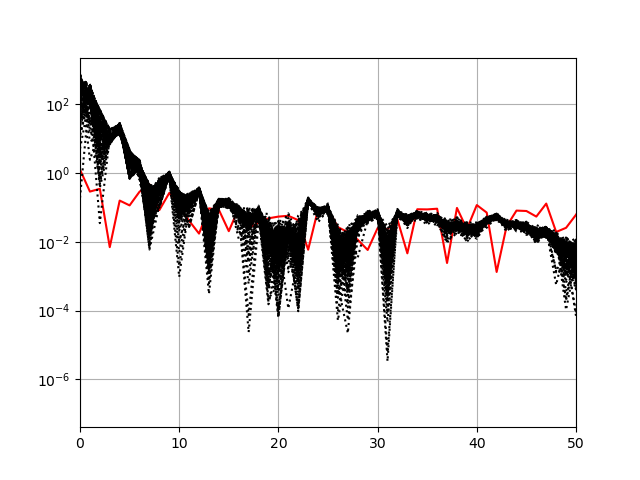

(1135, 200)


(0.0, 50.0)

In [352]:
plt.figure()
print(rmodels.shape)
#plt.semilogy(np.abs(np.dot(V, rmodels[78:79].T))**2)
plt.semilogy(np.abs(np.dot(Vd, reord)),'r')
#plt.semilogy(S, 'k.-')
plt.semilogy(np.abs(np.dot(Vd, (idata_flattened_dish[55:] - reord).T)), 'k:')
#plt.semilogy(np.abs(np.dot(V, (idata[-50:]).T))**2, 'r:')
plt.grid()
plt.xlim(0,50)

In [340]:
dot_matrix = np.zeros((len(freqs), len(freqs)))
dot_matrix_d = np.zeros_like(dot_matrix)
for i in range(dot_matrix.shape[0]):
    for j in range(dot_matrix.shape[1]):
        dot_matrix[i, j] = Vm[i] @ V[j]
        dot_matrix_d[i, j] = Vm[i] @ Vd[j]

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [346]:
dot_matrix - dot_matrix_d

array([[-6.76220352e-02,  6.11478396e-03, -1.40716878e-01, ...,
        -1.36308611e-02,  6.86276803e-03, -1.18388876e-02],
       [-1.62334153e-01,  6.01284946e-02,  3.78315249e-01, ...,
         1.47485172e-02, -1.27727640e-02,  4.94175170e-02],
       [ 7.93276493e-02, -6.59523698e-02,  1.03015696e+00, ...,
        -1.41914004e-02,  1.09994110e-02, -4.08602690e-02],
       ...,
       [-4.04094709e-03, -3.97024475e-03,  1.41917139e-03, ...,
         2.95636272e-01,  9.73786484e-02, -7.42901152e-03],
       [ 1.24877383e-03, -2.89388794e-04, -2.55932952e-03, ...,
        -9.03024156e-02,  5.79775131e-02, -5.83420416e-02],
       [-5.14275310e-02, -9.13167178e-02, -3.47017416e-02, ...,
         2.73812612e-03, -5.54888771e-02,  8.13803586e-01]])

<IPython.core.display.Javascript object>


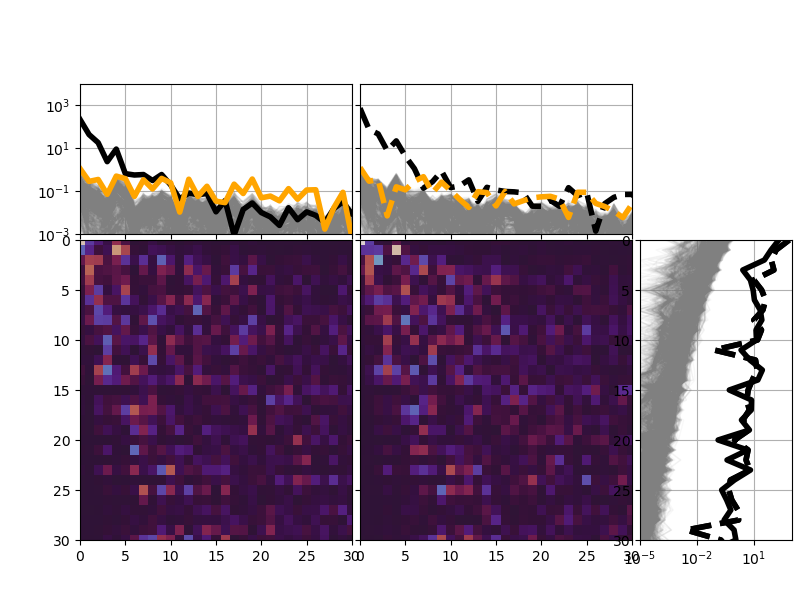

In [448]:
fig = plt.figure()
h_gap = 0.02
axarr=[fig.add_axes([0.1, 0.1, .35-h_gap/2, .5]), fig.add_axes([0.45, 0.1, .35-h_gap/2, .5]),
       fig.add_axes([0.8, 0.1, 0.2-h_gap/2, .5])]
axarr = [[fig.add_axes([0.1, 0.6+h_gap/2, .35-h_gap/2, .25]),
          fig.add_axes([0.45, 0.6+h_gap/2, .35-h_gap/2, .25])],
          axarr]

plt.sca(axarr[1][0])
plt.imshow(dot_matrix, vmin=-1, vmax=1, cmap='twilight', interpolation='nearest', aspect='auto')
#plt.colorbar()
plt.xlim(0, 30)
plt.ylim(30, 0)

plt.sca(axarr[1][1])
plt.imshow(dot_matrix_d, vmin=-1, vmax=1, cmap='twilight', interpolation='nearest', aspect='auto')
#plt.colorbar()
plt.xlim(0, 30)
plt.ylim(30, 0)
plt.gcf().set_size_inches(8, 6)
plt.gca().set_yticklabels([])



plt.sca(axarr[0][0])
plt.semilogy(np.abs(np.dot(V, rmodels.T)), lw=1, alpha=.05, color='grey')
x = np.abs(np.dot(V, (idata_flattened[np.argmin(np.mean(idata_flattened, axis=1))] - reord).T))
plt.semilogy(x, 
             'k-', lw=4)
plt.semilogy(np.abs(np.dot(V, reor)),color='orange', lw=4)
#index_tm4 = np.argmin(np.dot(V, ))

plt.grid()
plt.gca().set_xticklabels([])


plt.ylim(1e-3, 1e4)
plt.xlim(0,30)

plt.sca(axarr[0][1])
#plt.semilogy(np.abs(np.dot(Vd, )))
plt.semilogy(np.abs(np.dot(Vd, rmodelsd.T)), lw=1, alpha=.05, color='grey')
plt.semilogy(np.abs(np.dot(Vd, (idata_flattened_dish[np.argmin(np.mean(idata_flattened_dish, axis=1))] - reord).T)),
             'k--', lw=4)
plt.semilogy(np.abs(np.dot(Vd, reord)),color='orange', lw=4, ls='--')

plt.grid()

plt.ylim(1e-3, 1e4)
plt.xlim(0,30)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])


plt.sca(axarr[1][2])
plt.semilogx(np.abs(np.dot(Vm, rmodels.T)), np.arange(len(freqs)), lw=1, alpha=.05, color='grey')
plt.semilogx(np.abs(np.dot(Vm, (idata_flattened[np.argmin(np.mean(idata_flattened, axis=1))] - reor).T)),
                                np.arange(len(freqs)), lw=4, ls='-', color='k')
plt.semilogx(np.abs(np.dot(Vm, (idata_flattened_dish[np.argmin(np.mean(idata_flattened_dish, axis=1))] - reord).T)),
                                np.arange(len(freqs)), lw=4, ls='--', color='k')
plt.semilogx(np.abs(np.dot(Vm, (idata_flattened_dish[np.argmin(np.mean(idata_flattened_dish, axis=1))] - reord).T)),
                                np.arange(len(freqs)), lw=4, ls='--', color='k')
plt.semilogx(np.abs(np.dot(Vm, reor)), np.arange(len(freqs))[::-1], ls='--', color='orange', lw=4)
plt.ylim(30,0)
plt.grid()
plt.xlim(1e-5,1e3)
plt.savefig('pc_plot.png', bbox_inches='tight')

In [320]:
iS = np.identity(S.size)
#np.fill_diagonal(iS, np.where(S > 1e12, 1e12/S, 1))
#np.fill_diagonal(iS, 4e-7/S.clip(4e-7, np.Inf))
iS[:18,:18] = 0
#iS[:16,:16] = 0
Cinv = np.dot(V.T, np.dot(iS, U.T))

<IPython.core.display.Javascript object>


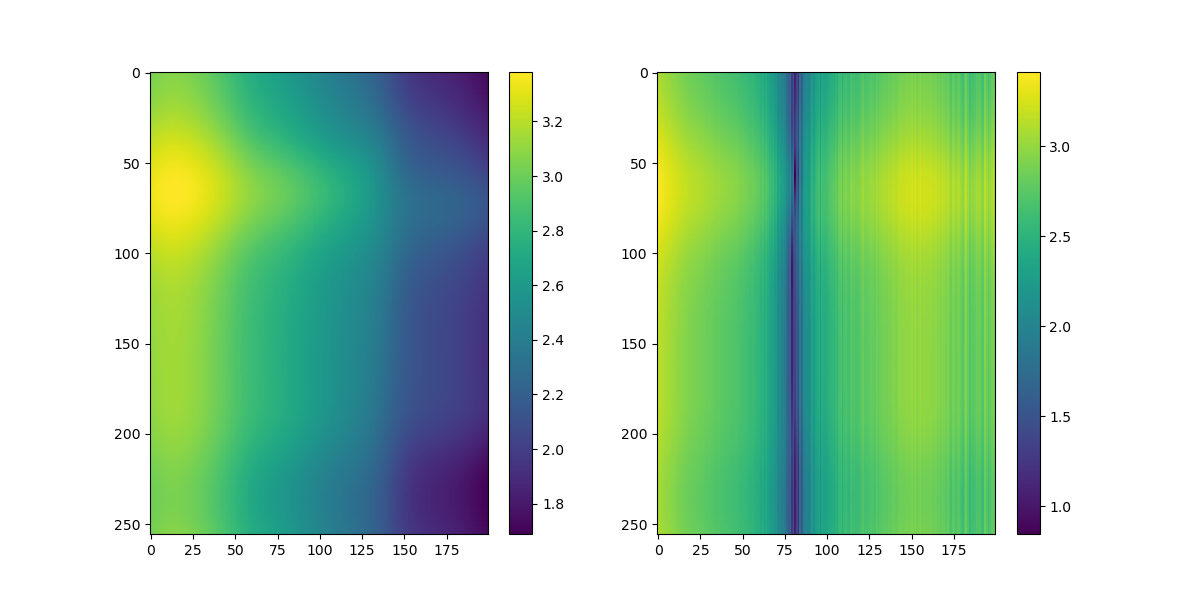

In [321]:
plt.figure(figsize=(12,6))
plt.subplot(121)
uvtools.plot.waterfall(idata, mode='log')
plt.colorbar()
plt.subplot(122)
uvtools.plot.waterfall(np.dot(Cinv, idata.T).T, mode='log')
plt.colorbar()

<IPython.core.display.Javascript object>


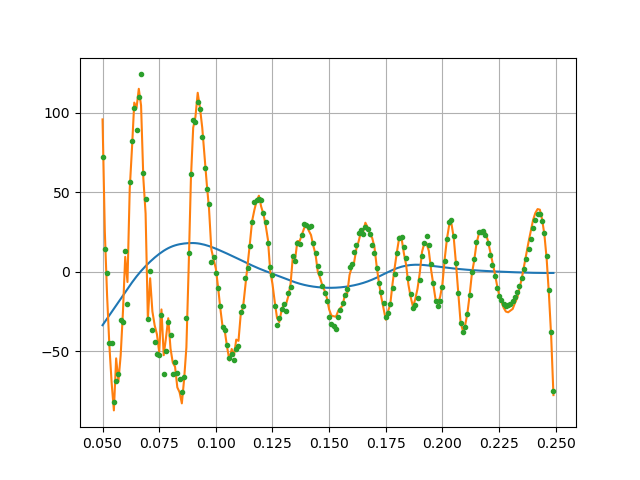

/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/lustre/aoc/projects/hera/aewallwi/miniconda3/envs/hera3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [322]:
plt.figure()
plt.plot(freqs, np.mean(idata_flattened[-50:], axis=0))
plt.plot(freqs, 1e3*np.mean(np.dot(Cinv, idata_flattened[-50:].T).T, axis=0))
plt.plot(freqs, 1e3*np.dot(Cinv, reor), '.')
plt.grid()

In [323]:
detect = np.mean(np.dot(Cinv, idata_flattened.T).T, axis=0)
template = np.dot(Cinv, reor)
print(np.dot(detect, template) / np.dot(template, template))

(1.0023462106481245+0j)
